In [2]:
import tfscreen
from tfscreen.plot import heatmap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Get category of epistasis vs. IPTG

Do an epistasis analysis, then fit a categorical model to it

In [12]:
theta_file = "/Users/harmsm/Desktop/keep/theta_df.csv"

# Load dataframe and make genotype into categorical
df = tfscreen.util.read_dataframe(theta_file)
df = tfscreen.genetics.set_categorical_genotype(df)

['wt' 'H29A' 'S69H' 'H29A/S69H']


  0%|          | 0/1 [00:00<?, ?it/s]

,best_model,best_model_R2,best_model_AIC_weight,status,w_biphasic_peak,w_biphasic_dip,w_inducer,w_hill_inducer,w_bell_dip,w_bell_peak,w_repressor,w_hill_repressor,w_flat,w_linear
genotype,,,,,,,,,,,,,,
H29A/S69H,biphasic_peak,0.878486,0.795954,partial,0.795954,0.079709,0.047904,0.040839,0.030752,0.004678,0.00012,0.000044,NaN,NaN


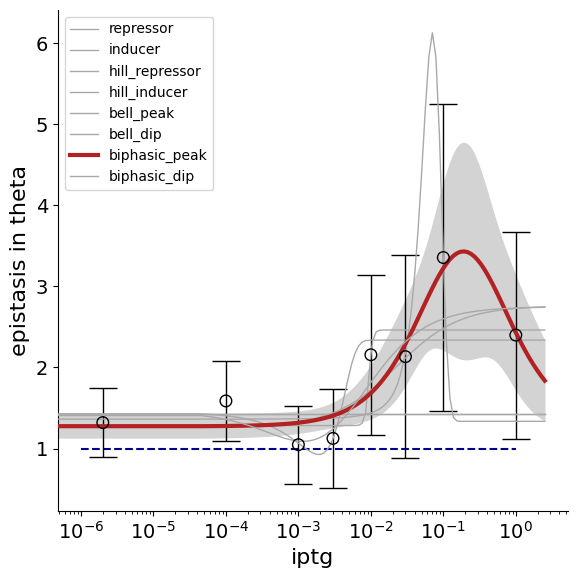

In [17]:
# Use categorizer on epistasis versus titrant conc

mutant_cycle = 100
epistasis_scale = "mult"

# Get zero value for plot. For multiplicative, zero epistasis is 
# 1.0. For additive, zero epistasis is zero
if epistasis_scale == "mult":
    zero_value = 1
else:
    zero_value = 0


# Get cycles
cycles = tfscreen.genetics.build_cycles(df["genotype"])

# Get the data corresponding to this cycle
cycle_selector = cycles[mutant_cycle]
print(cycle_selector)
cycle_df = df[df["genotype"].isin(cycle_selector)]

# Get epistasis
ep_out = tfscreen.analysis.extract_epistasis(cycle_df,
                                             condition_selector=["titrant_conc"],
                                             y_obs="theta_est",
                                             y_std="theta_std",
                                             scale=epistasis_scale)

# Run the model categorizer
ep_model_dict, ep_fit_summary_df, ep_pred_df = tfscreen.analysis.cat_response(
    ep_out,
    x_column="titrant_conc",
    y_column="ep_obs",
    y_std_column="ep_std",
)

# Plot the results of the model categorizer
fig, ax = tfscreen.plot.cat_fits(ep_out["titrant_conc"],
                                 ep_out["ep_obs"],
                                 ep_out["ep_std"],
                                 ep_pred_df,
                                 xlog=True,
                                 xlabel="iptg",
                                 ylabel="epistasis in theta")

ax.plot([1e-6,1],[zero_value,zero_value],'--',color="darkblue")
ep_fit_summary_df